In [9]:
import csv
import os

## Function for Mean
def getMean(sample):
    sampleSize = len(sample)
    totalSumIncome = 0
    for row in sample:
        totalSumIncome = row + totalSumIncome
    mean = totalSumIncome / sampleSize
    return mean

## Function target sample variance
def getSampleVariance(sample):
    mean = getMean(sample)
    sumOfSquares = 0
    sampleSize = len(sample)
    for row in sample:
        deviationScore = row - mean
        sumOfSquares = deviationScore**2 + sumOfSquares
    variance = sumOfSquares / (sampleSize-1)
    return variance

## Function target sample Standard Deviation
def getSampleSD(sample):    
    variance = getSampleVariance(sample)
    sampleSD = variance**0.5
    return sampleSD

## Sample Standard Error
def getSampleStandardError(sample):
    sampleSize = len(sample)
    sampleSD = getSampleSD(sample)
    # standard error of the mean for the population
    SSE = sampleSD / sampleSize**0.5
    return SSE

In [10]:
##
def getDifferenceScores(sample):
    differenceScores = []
    for row in sample:
        before = row[0]
        after = row[1]
        differenceScore = after - before
        differenceScores.append(differenceScore)
    return differenceScores

In [11]:
def pairedSamplesTScore(sample):
    sampleSize = len(sample)
    differenceScores = getDifferenceScores(sample)
    meanDifference = getMean(differenceScores)
    SDDifference = getSampleSD(differenceScores)
    mu = 0
    t = (meanDifference - mu)/(SDDifference/(sampleSize**0.5))
    return t

In [12]:
# Getting 
def getCriticalT(alpha, df, testType = 'two-tailed'):
    df = round(df)
    if df > 120:
        df = 120
    criticalT = 0
    
    if testType == 'two-tailed':
        folder_path = r"C:\Users\yrobi\Desktop\Robin World\Data Science - Machine Learning Prep\1A - Statistics\Statistical_Causal_Inference_Analysis\data"
        csv_file_path = os.path.join(folder_path, "t_table.csv")
        with open(csv_file_path, newline='') as tFile:
            tData = csv.reader(tFile)
            for row in tData:
                if int(row[0]) == df:
                    if float(row[2]) >= (float(1-(alpha/2))):
                        criticalT = float(row[1])
                        break
   
    elif testType == 'one-tailed positive':
        folder_path = r"C:\Users\yrobi\Desktop\Robin World\Data Science - Machine Learning Prep\1A - Statistics\Statistical_Causal_Inference_Analysis\data"
        csv_file_path = os.path.join(folder_path, "t_table.csv")
        with open(csv_file_path, newline='') as tFile:
            tData = csv.reader(tFile)
            for row in tData:
                if int(row[0]) == df:
                    if float(row[2]) >= (float(1-(alpha))):
                        criticalT = float(row[1])
                        break

    elif testType == 'one-tailed negative':
        folder_path = r"C:\Users\yrobi\Desktop\Robin World\Data Science - Machine Learning Prep\1A - Statistics\Statistical_Causal_Inference_Analysis\data"
        csv_file_path = os.path.join(folder_path, "t_table.csv")
        with open(csv_file_path, newline='') as tFile:
            tData = csv.reader(tFile)
            for row in tData:
                if int(row[0]) == df:
                    if float(row[2]) >= (float(alpha)):
                        criticalT = float(row[1])
                        break
    return criticalT

In [13]:
## p score
def getPFromT(t, df):
    df = round(df)
    if df > 120:
        df = 120
    if t > 6:
        p = 1.0
    elif t < -6:
        p = 0.0
    elif t > -6 and t < 6:
        folder_path = r"C:\Users\yrobi\Desktop\Robin World\Data Science - Machine Learning Prep\1A - Statistics\Statistical_Causal_Inference_Analysis\data"
        csv_file_path = os.path.join(folder_path, "t_table.csv")
        with open(csv_file_path, newline='') as tFile:
            tData = csv.reader(tFile)
            for row in tData:
                if float(row[1]) == round(float(t), 2):
                    p = float(row[2])
    return p

In [14]:
## Rather than something like "t-test" we are just calling this significance test
def significanceTest(sample, alpha, testType='two-tailed'):
    sampleSize = len(sample)
    df = sampleSize - 1
    critT = getCriticalT(alpha, df, testType)
    t = pairedSamplesTScore(sample)
    p = getPFromT(t, df)
    
    significant = False
    if testType == 'two-tailed':
        if t < -critT or t > critT:
            significant = True
    elif testType == 'one-tailed positive':
        if t > critT:
            significant = True
    elif testType == 'one-tailed negative':
        if t < -critT:
            significant = True
    
    return significant, t, critT, p

In [15]:
# Same 
def getCI(sample, alpha):
    mean = getMean(sample)
    SSE = getSampleStandardError(sample)
    df = len(sample) - 1
    testType = 'two-tailed'
    critT = getCriticalT(alpha, df, testType)
    lowerCI = mean - critT*SSE
    upperCI = mean + critT*SSE
    error = critT*SSE
    return lowerCI, upperCI, error

In [16]:
## Example for today: Super amazing financial advice
incomeData = []
folder_path = r"C:\Users\yrobi\Desktop\Robin World\Data Science - Machine Learning Prep\1A - Statistics\Statistical_Causal_Inference_Analysis\data"
csv_file_path = os.path.join(folder_path, "usa.csv")
with open(csv_file_path, newline='') as myFile:
    data = csv.reader(myFile)
    for row in data:
        if row[6] != 'INCTOT':
            if int(row[6]) > 1:
                if int(row[6]) != 999999:
                    if int(row[1]) > 17:
                        incomeData.append(int(row[6]))


In [17]:
import random

incomeDataSample = random.sample(incomeData, 24)
# print(incomeDataSample)

incomeAfterTreatment = []
for row in incomeDataSample:
#     print(row)
    treatmentImpact = random.randint(-200, 500)
#     print(treatmentImpact)
    afterAdviceIncome = row + treatmentImpact
    incomeAfterTreatment.append(afterAdviceIncome)


aggregatedIncomeData = []
i = 0
for row in incomeDataSample:
    new_row = [row, incomeAfterTreatment[i]]
    i += 1
    aggregatedIncomeData.append(new_row)

incomeSampleMean = getMean(incomeDataSample)
incomeAfterTreatmentMean = getMean(incomeAfterTreatment)


alpha = 0.05
testType = 'one-tailed positive'

sigBool, t, criticalT, p = significanceTest(aggregatedIncomeData, alpha,
                                          testType)

if sigBool:
    print('The Dependent T-test for paired samples was significant at'+
         ' alpha =', alpha, 'where p=', round(p, 5), 'and t =', round(t, 2),
         '\nCritical T =', criticalT, 
         '\nMean income before Awesome advice: ', round(incomeSampleMean, 2),
         '\nMean income after Awesome advice: ', round(incomeAfterTreatmentMean, 2))
if not sigBool:
    print('The Dependent T-test for paired samples was NOT significant at'+
         ' alpha =', alpha, 'where p=', round(p, 5), 'and t =', round(t, 2),
         '\nCritical T =', criticalT, 
         '\nMean income before Awesome advice: ', round(incomeSampleMean, 2),
         '\nMean income after Awesome advice: ', round(incomeAfterTreatmentMean, 2))

    
## CIs
beforeLower, beforeUpper, beforeError = getCI(incomeDataSample, alpha)
afterLower, afterUpper, afterError = getCI(incomeAfterTreatment, alpha)

The Dependent T-test for paired samples was significant at alpha = 0.05 where p= 0.99946 and t = 3.35 
Critical T = 1.72 
Mean income before Awesome advice:  40325.0 
Mean income after Awesome advice:  40456.96


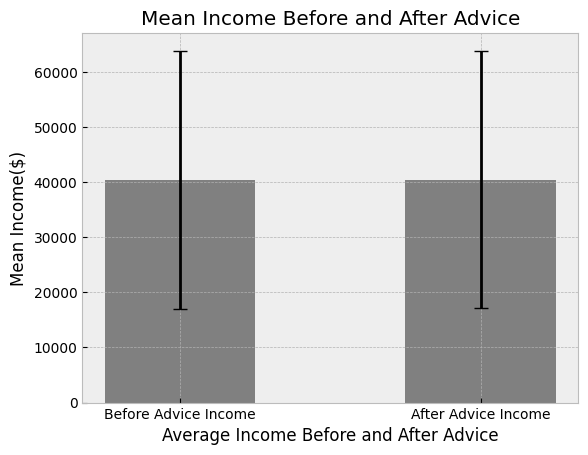

In [18]:
import matplotlib.pyplot as plt
plt.style.use('bmh')
labels = ['Before Advice Income', 'After Advice Income']
means = [incomeSampleMean, incomeAfterTreatmentMean]
CIs = [beforeError, afterError]
positions = [0, 1]

plt.bar(positions, means, color='grey', yerr=CIs, width=0.5, 
        align='center', ecolor='black', capsize=5)
plt.xlabel('Average Income Before and After Advice')
plt.ylabel('Mean Income($)')
plt.title('Mean Income Before and After Advice')
plt.xticks(positions, labels)
plt.show()